<a href="https://colab.research.google.com/github/DeyVolK/GoIT/blob/main/pt_lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

response = requests.get("https://uadata.net/work-positions/cities.json")
data_json = response.json()
df = pd.DataFrame(data_json["data"])
df.head()
df.shape

(387, 2)

In [51]:
df.dtypes

at     object
val     int64
dtype: object

In [52]:
df["at"] = pd.to_datetime(df["at"])

In [53]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

In [73]:
#// https://uadata.net/work-positions/cities.json
df = df.rename(columns={"at":"Дата", "val":"Вакансії"})
df.head()

,Дата,Вакансії
0,2022-05-23,31876
1,2022-05-24,31626
2,2022-05-25,31928
3,2022-05-26,34621
4,2022-05-27,35312


In [55]:
df.set_index('Дата', inplace=True)

Побудова графіків

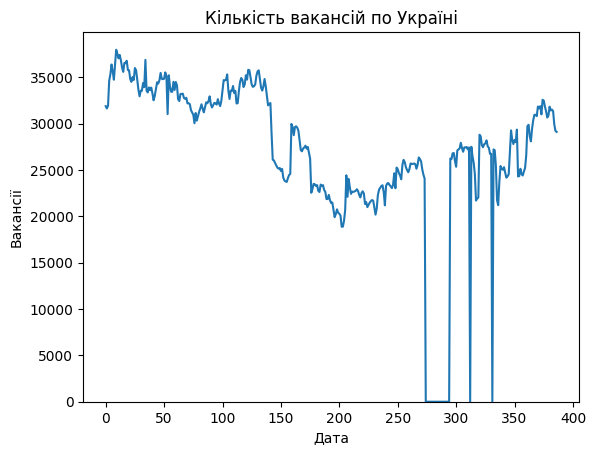

In [74]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Україні")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [75]:
df["Вакансії"] = df['Вакансії'].replace(0, np.nan)
df['Вакансії'] = df["Вакансії"].interpolate()

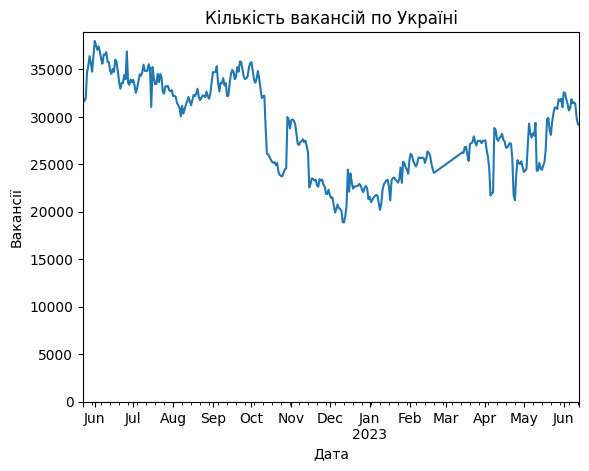

In [66]:
df["Вакансії"].plot()
plt.title("Кількість вакансій по Україні")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [77]:
df['rolling_mean'] = df['Вакансії'].rolling(window=7).mean()

In [78]:
df

,Дата,Вакансії,rolling_mean
0,2022-05-23,31876.0,NaN
1,2022-05-24,31626.0,NaN
2,2022-05-25,31928.0,NaN
3,2022-05-26,34621.0,NaN
4,2022-05-27,35312.0,NaN
...,...,...,...
382,2023-06-09,31507.0,31340.000000
383,2023-06-10,31335.0,31270.857143
384,2023-06-11,29922.0,31070.714286
385,2023-06-12,29208.0,30865.000000


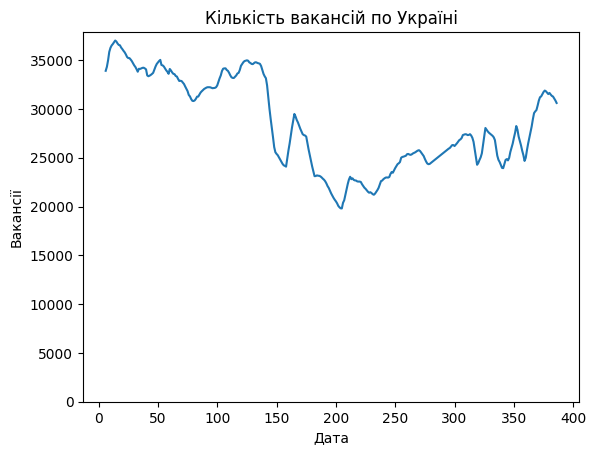

In [79]:
df["rolling_mean"].plot()
plt.title("Кількість вакансій по Україні")
plt.xlabel('Дата')
plt.ylabel('Вакансії')
plt.ylim(bottom=0)
plt.show()

In [24]:
df.describe()

,val
count,387.000000
mean,26944.245478
std,8267.850504
min,0.000000
25%,23558.000000
50%,27475.000000
75%,32857.000000
max,37961.000000


In [20]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Одеса")
data_json = response.json()
df_odesa = pd.DataFrame(data_json["data"])
df_odesa["at"] = pd.to_datetime(df_odesa["at"])
df_odesa = df_odesa.rename(columns={"at":"Дата", "val":"Вакансії"})
df_odesa.set_index('Дата', inplace=True)
df_odesa["Вакансії"] = df_odesa['Вакансії'].replace(0, np.nan)
df_odesa['Вакансії'] = df_odesa["Вакансії"].interpolate()
df_odesa['rolling_mean'] = df_odesa['Вакансії'].rolling(window=7).mean()

In [22]:
response = requests.get("https://uadata.net/work-positions/cities.json?o=Львів")
data_json = response.json()
df_lviv = pd.DataFrame(data_json["data"])
df_lviv["at"] = pd.to_datetime(df_lviv["at"])
df_lviv = df_lviv.rename(columns={"at":"Дата", "val":"Вакансії"})
df_lviv.set_index('Дата', inplace=True)
df_lviv["Вакансії"] = df_lviv['Вакансії'].replace(0, np.nan)
df_lviv['Вакансії'] = df_lviv["Вакансії"].interpolate()
df_lviv['rolling_mean'] = df_lviv['Вакансії'].rolling(window=7).mean()

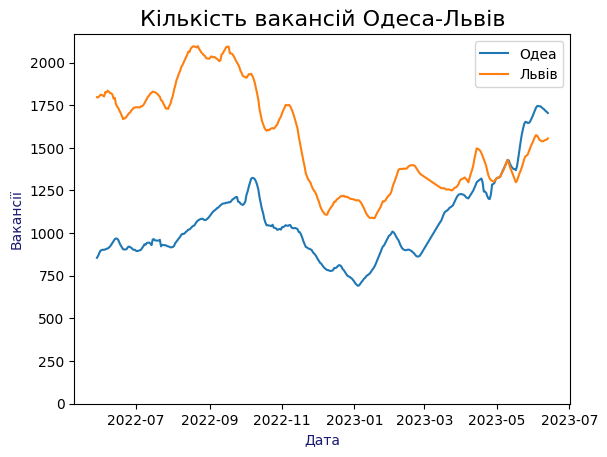

In [25]:
fig, axs = plt.subplots()
axs.plot(df_odesa.index, df_odesa["rolling_mean"], label = "ОдесPа")
axs.plot(df_lviv.index, df_lviv["rolling_mean"], label = "Львів")
plt.title("Кількість вакансій Одеса-Львів", fontsize=16)
plt.xlabel('Дата', color='midnightblue')
plt.ylabel('Вакансії', color='midnightblue')
plt.ylim(bottom=0)
plt.legend()
plt.show()